# Author-Namagiri Lakshmi TB

**TASK 3 : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

**Organisation : THE SPARKS FOUNDATION.**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the dataset
df=pd.read_csv("SampleSuperstore.csv")

#visualizing the first 5 elements of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

Our dataset has 9994 rows and 13 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values present in our dataset

In [106]:
#Checking for duplicates
df1=df.duplicated().sum()

In [107]:
# dropping the duplicates and storing it in df1
df1=df.drop_duplicates()

In [108]:
#Checking duplicates are dropped
df1.duplicated().sum()

0

In [109]:
df1.shape

(9977, 13)

We have dropped the duplicate data

In [21]:
df1['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [22]:
df1['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [23]:
df1['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [24]:
df1['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [25]:
df1['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [26]:
df1.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


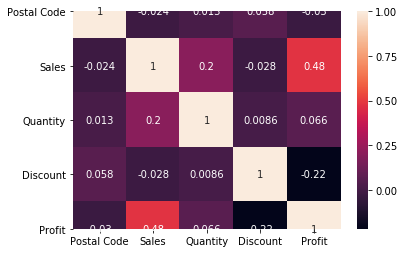

In [30]:
sns.heatmap(df.corr(),annot=True)

We notice a positive correlation between Profit and Sales and negative correlation between profit and discount

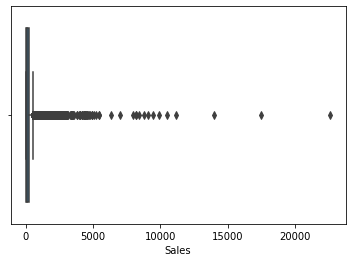

In [32]:
#outlier check for sale column.
sns.boxplot(x=df1['Sales'])

There is a lot of outliers present in Sales.

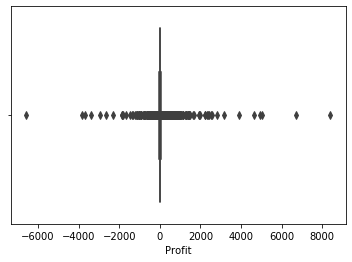

In [33]:
sns.boxplot(x=df1['Profit'])
#we again notice HUGE AMOUNT of outliers in profit as well.

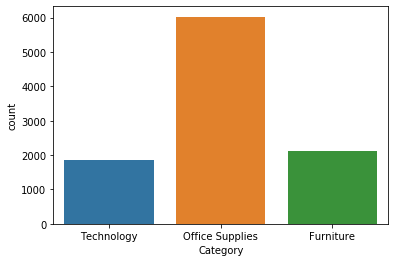

In [76]:
sns.countplot(df1['Category'])

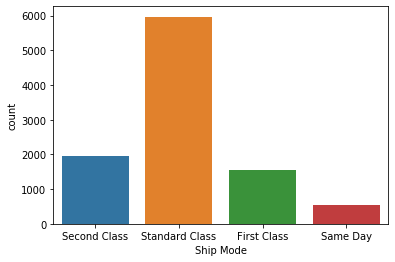

In [78]:
sns.countplot(df['Ship Mode'])

From the above graph we can conclude **standard class** in the most used ship mode and **office Supplies** are most sold.

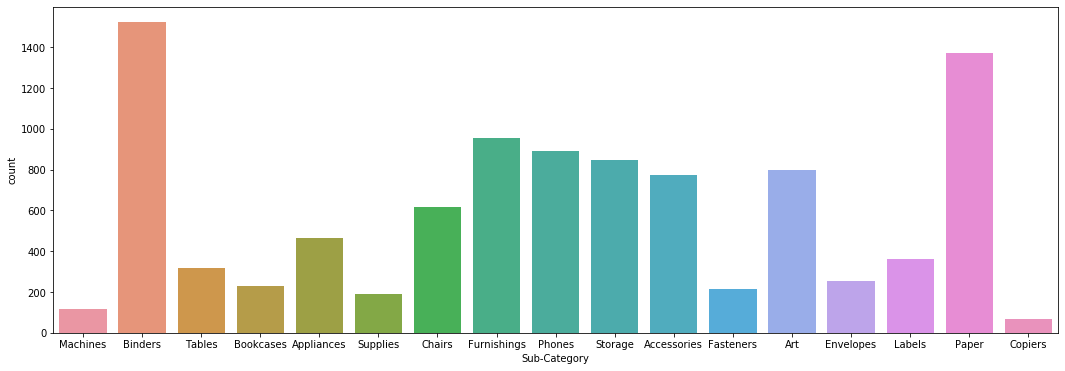

In [79]:

plt.figure(figsize=(18,6))
sns.countplot(df1['Sub-Category'])

Papers and binders are most sold, Copiers are the least sold. Phones,furnishings,storage and art are sold moderately.

In [94]:
#to check the cities in which items are sold the most.
df_city = df1['City'].value_counts()
df_city=df_city.head(100)

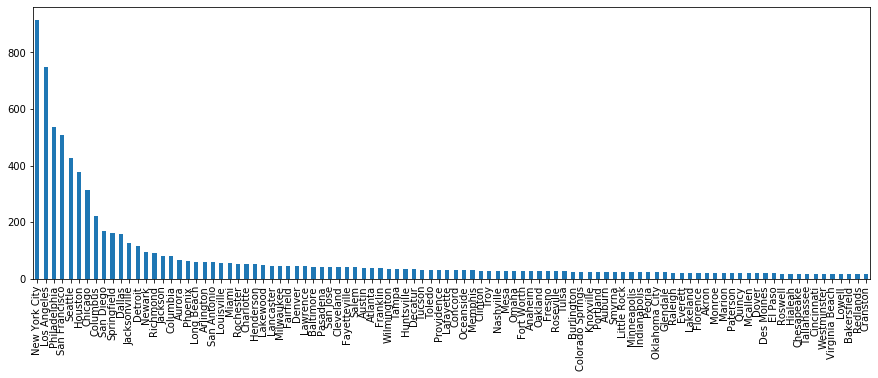

In [95]:
df_city.plot(kind='bar',figsize=(15,5))


Most of the items are sold in New york,los Angeles,Philadelphia,San francisco and Seattle(TOP 5)

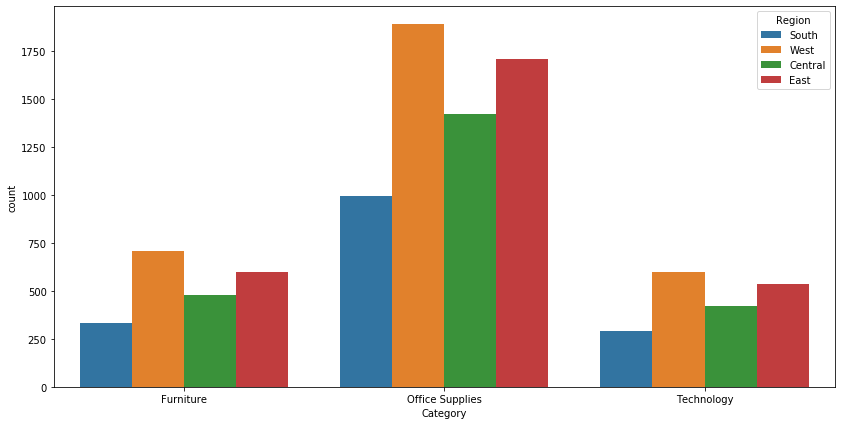

In [42]:
#Count of Sub-Category region wise
plt.figure(figsize=(14,7))
sns.countplot(x="Category", hue="Region", data=df1)
plt.show()

Office supplies are sold the most.


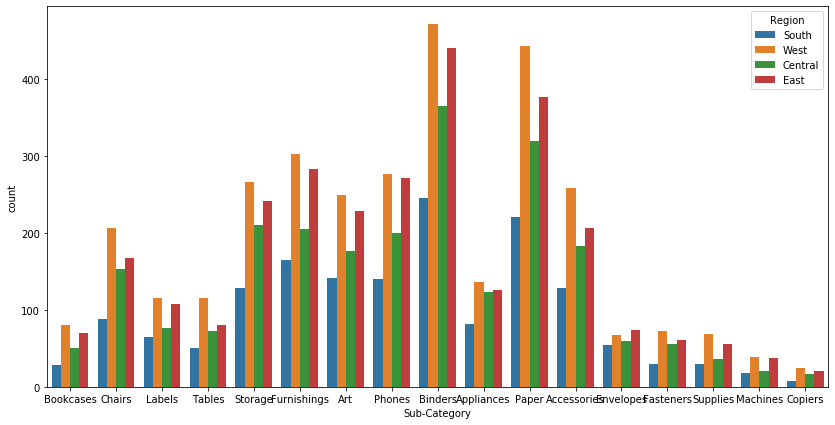

In [41]:
#Count of Sub-Category region wise
plt.figure(figsize=(14,7))
sns.countplot(x="Sub-Category", hue="Region", data=df1)
plt.show()

From the above chart we can conclude that people  from south of US order very less.
Central part being moderate,East slightly high and the **Western part** order the most.

**Binders** and **Paper items** are ordered the most.

In [54]:
df_state= df1.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


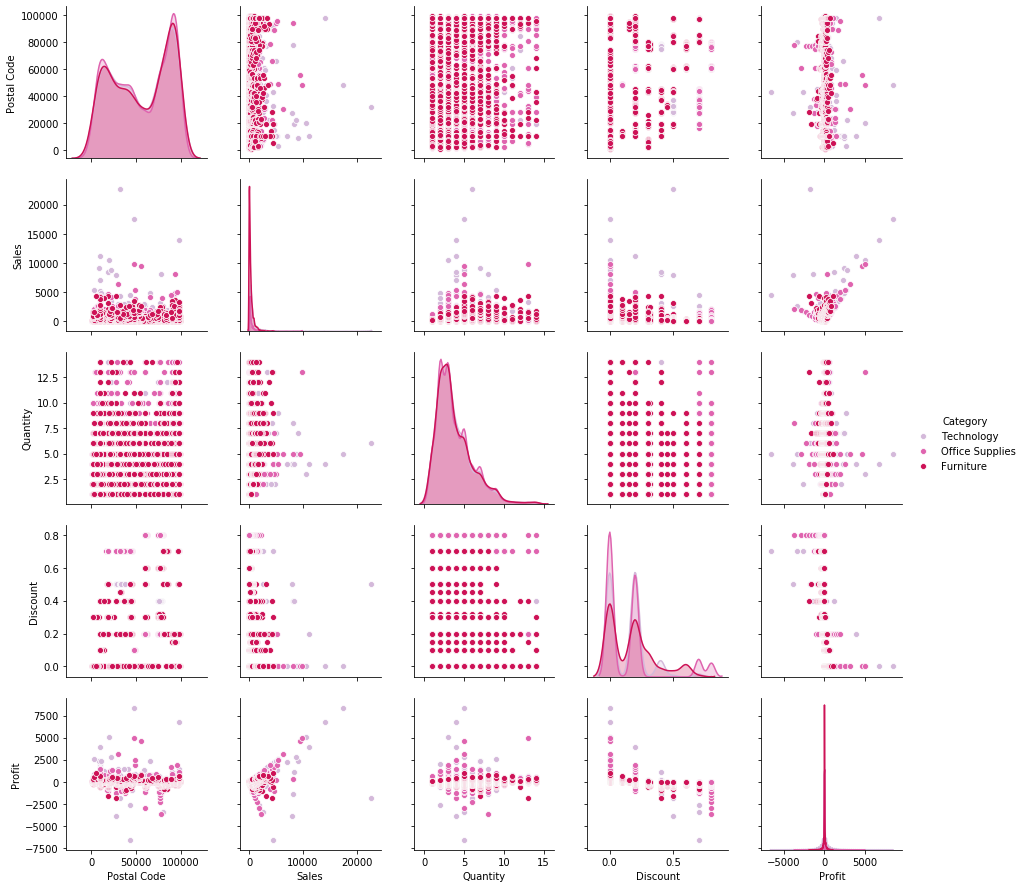

In [70]:
#pairplot based on Category
sns.pairplot(df1,hue='Category',palette='PuRd')

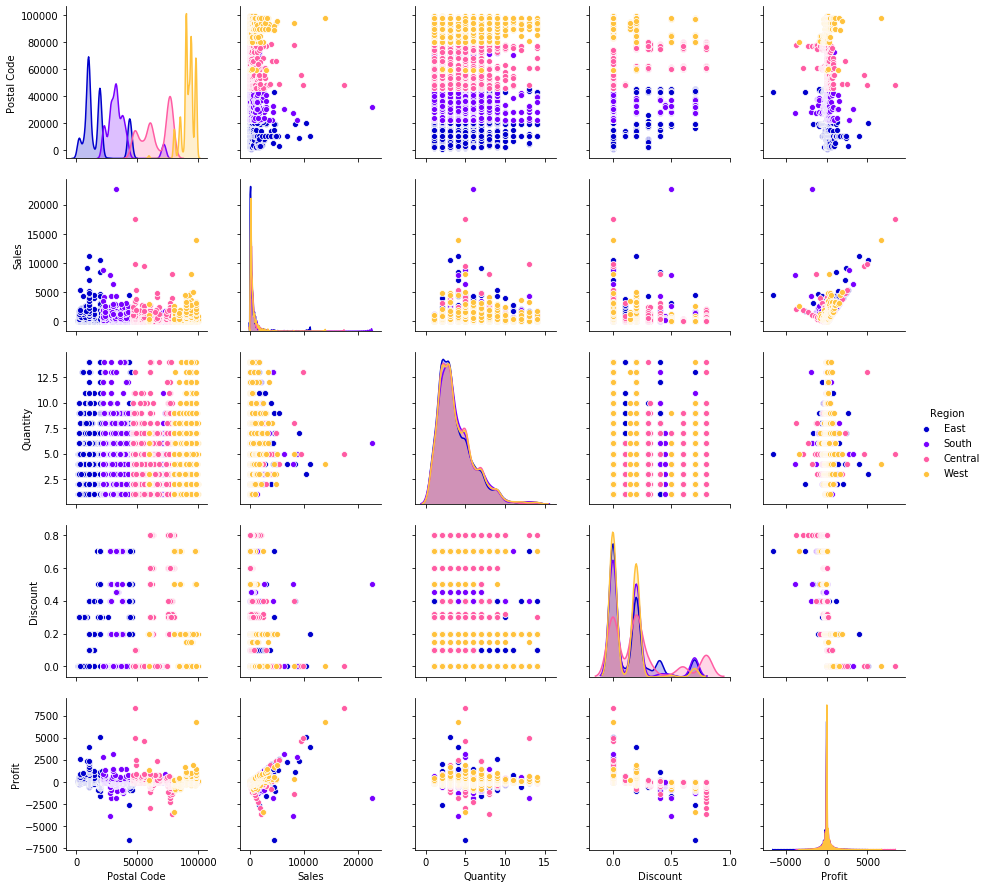

In [74]:
#pairplot based on Region
sns.pairplot(df1,hue='Region',palette='gnuplot2')

In [ ]:
#Count of Sub-Category region wise
plt.figure(figsize=(14,7))
sns.countplot(x="Sub-Category", hue="Region", data=df1)
plt.show()

In [97]:
df_sc = df1.groupby(['Sub-Category'])[['Sales','Profit']].mean()
df_sc.head(10)

,Sales,Profit
Sub-Category,,
Accessories,215.974604,54.111788
Appliances,230.755710,38.922758
Art,34.068834,8.200737
Binders,133.560560,19.843574
Bookcases,503.859633,-15.230509
Chairs,532.332420,43.095894
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


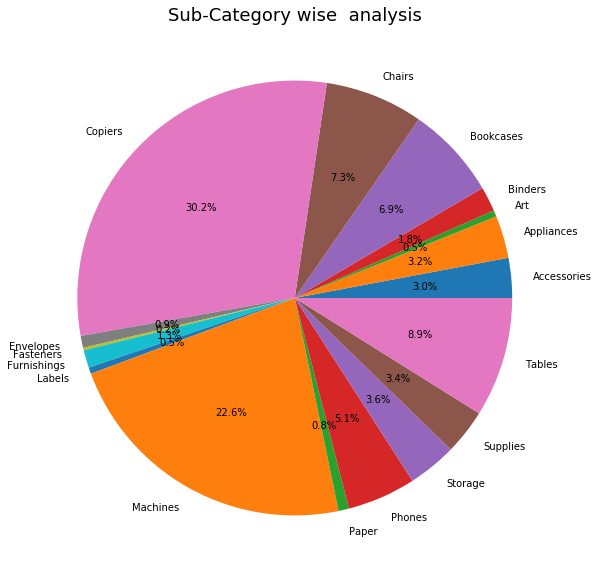

In [100]:

plt.figure(figsize = (10,10))
plt.pie(df_sc['Sales'], labels = df_sc.index, autopct = '%1.1f%%')
plt.title('Sub-Category wise  analysis', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

We notice from the above graph fasterners have least Sale, Machines and Copiers have greater sales,Chairs and Tables have moderate Sales.

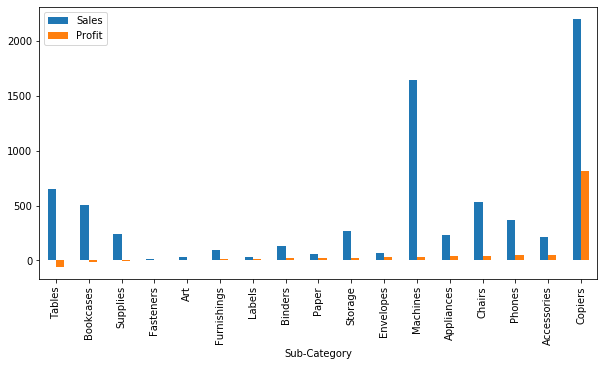

In [104]:
df_sc.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5) )

Sale of Machines is high but profit is very low. The sale and profit of **Copiers** are high. Tables are facing a loss as the profit is negative.

***CONCLUSION***


Our dataset has a shape of (9994,13)

There are no null values present in our dataset

There are duplicate data present,hence after dropping the duplicates the shape of our data is (9977,13)

We notice high sales in office supplies.

Sales are high in the **WEST**


By focusing on the sale of Office supplies, profit can be made.

***Thank you! :)***